**Import Necessary Libraries**

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**<font color = red size = 5>Potential Training**

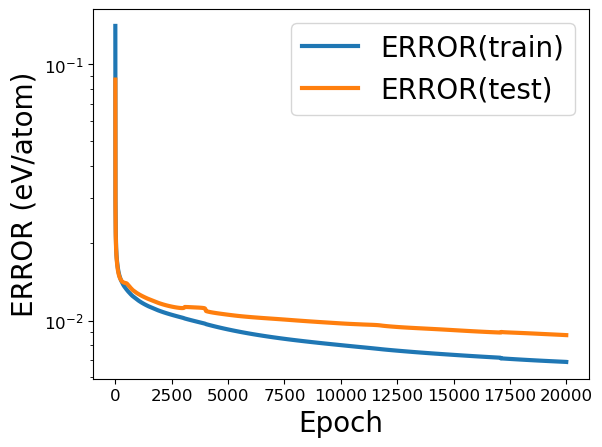

In [2]:
path = os.getcwd().replace('\\','/')
path_list = os.listdir(path)
num = []
regex = re.compile(r'\w+\.+out+\d$')
for i in path_list:
    num += regex.findall(i)
po = []
path_out = path + '/{}'
for i in list(range(len(num))):
    po.append(path_out.format(num[i]))
errors = []
for i in list(range(len(num))):
    with open(po[i]) as file:
        for line in file:
            if re.match("^ *[0-9].* \|+", line):
                ai = re.split(r'\W+\.?\W', line)
                bi = ai[2:6]
                errors.append(bi)
errors = np.array(errors)
errors = pd.DataFrame(
    data=errors,
    columns=['ERROR(train)', 'ERROR(test)', 'E(train)', 'E(test)'])
errors = errors.astype(float)
errors.plot(None, y = ['ERROR(train)', 'ERROR(test)'], kind = 'line', logy = True, linewidth=3) # type: ignore
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('ERROR (eV/atom)', fontsize=20)
plt.tick_params(labelsize=12)
plt.legend(fontsize=20)
plt.show()

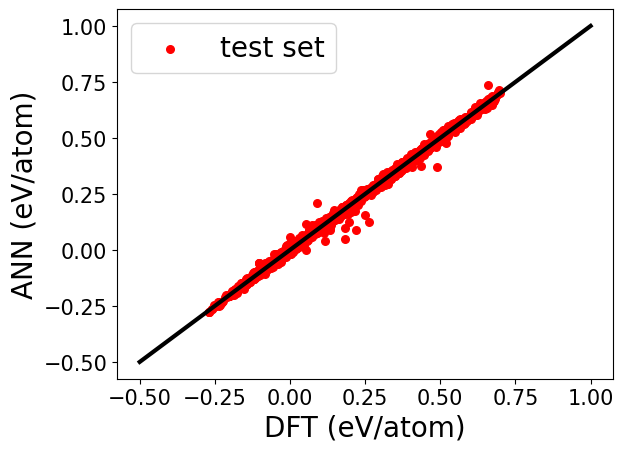

In [3]:
test = r"energies.test"
test_errors = np.loadtxt(test, skiprows=1, usecols=(3,4))
limits = np.linspace(-0.5, 1.0)
plt.plot(limits, limits, color="black", linewidth=3)
plt.ticklabel_format(useOffset=False)
plt.scatter(test_errors[:,0], test_errors[:,1], color="red", s=30, label="test set")
plt.tick_params(labelsize=15)
plt.xlabel('DFT (eV/atom)', fontsize=20)
plt.ylabel('ANN (eV/atom)', fontsize=20)
plt.legend(fontsize=20)
plt.show()

**<font color = red size = 5>Stress-Strain Curve**

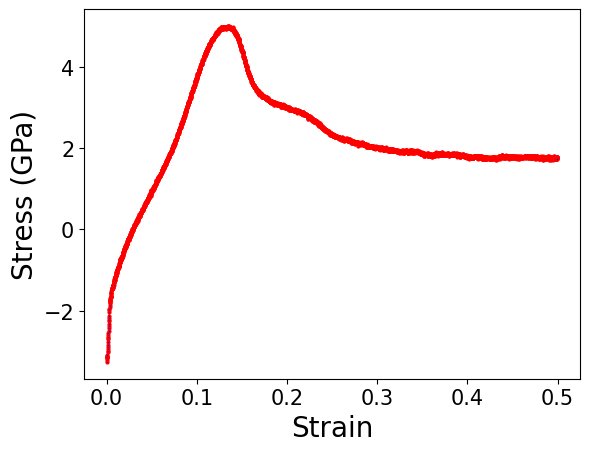

In [4]:
content = []
modify = []
stress = []
cwd = os.getcwd().replace('\\','/')
file_name = r"/strain1-stress1.txt" 
with open(cwd + file_name) as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i > 0:
            content.append(lines[i].strip().split())
    for i in list(range(len(content))):
        modify.append(float(content[i][0]))
        stress.append(float(content[i][2])) 
f.close()
plt.plot(modify[:5000], stress[:5000], color='red', linestyle='solid', linewidth=1,
         marker='o', markerfacecolor='blue', markersize=2)
plt.xlabel("Strain", fontsize=20)
plt.ylabel("Stress (GPa)", fontsize=20)
plt.tick_params(labelsize=15)
plt.show()